In [1]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

In [ ]:
gridworld = np.array([
    ['R', 'R', 'H', 'R', 'R'],
    ['R', 'H', 'H', 'R', 'R'],
    ['R', 'R', 'H', 'H', 'R'],
    ['R', 'H', 'R', 'H', 'R'],
    ['R', 'R', 'R', 'R', 'G']
])


rewards = {

    'G': 10,
    'H': -10,
    'R': -1

}

# Visualise

#### visualise grid world

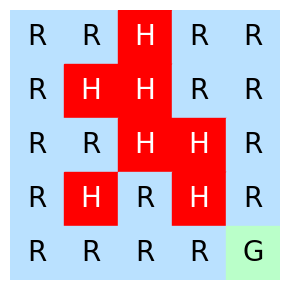

In [5]:

fig, ax = plt.subplots(figsize=(3,3))
# Create a color map
# Create a color map with lighter colors
color_map = {'H': '#FF0000',  # Darker red
             'G': '#BAFFC9',  # Light green
             'R': '#BAE1FF'}  # Light blue
# Iterate through the grid and color cells
for (i, j), value in np.ndenumerate(gridworld):
    color = color_map[value]
    ax.add_patch(plt.Rectangle((j, 4-i), 1, 1, fill=True, color=color))
# Set the limits of the plot
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
# Remove the axes
ax.set_axis_off()
# Add grid lines
ax.grid(which='major', axis='both', linestyle='-', color='gray', linewidth=1)
# Add text labels to each cell

for (i, j), value in np.ndenumerate(gridworld):
    # Use white text for red cells, black for others
    text_color = 'white' if value == 'H' else 'black'
    ax.text(j + 0.5, 4 - i + 0.5, value, ha='center', va='center', fontsize=20, color=text_color)
# Set the title
# plt.title('Gridworld Visualization', fontsize=16)
# Show the plot
plt.tight_layout()
plt.show()

In [15]:
def visualize_gridworld(gridworld, state_values):
    # Create a figure and axis"
    fig, ax = plt.subplots(figsize=(4, 4))
    # Create a color map with darker red and lighter green and blue
    color_map = {'H': '#FF0000',  # Darker red
                 'G': '#BAFFC9',  # Light green
                 'R': '#BAE1FF'}  # Light blue
    # Iterate through the grid and color cells
    for (i, j), value in np.ndenumerate(gridworld):
        color = color_map[value]
        ax.add_patch(plt.Rectangle((j, 4-i), 1, 1, fill=True, color=color))
    # Function to get the maximum neighbor value and direction
    def get_max_neighbor(i, j):
        neighbors = [
            (i-1, j, '↑'),  # up
            (i+1, j, '↓'),  # down
            (i, j-1, '←'),  # left
            (i, j+1, '→')   # right
        ]
        max_value = float('-inf')
        max_direction = ''
        for ni, nj, direction in neighbors:
            if 0 <= ni < 5 and 0 <= nj < 5:
                if state_values[ni, nj] > max_value:
                    max_value = state_values[ni, nj]
                    max_direction = direction
        return max_direction
    # Add text labels and arrows to each cell
    for (i, j), value in np.ndenumerate(gridworld):
        # Skip the bottom-right cell
        if i == 4 and j == 4:
            continue
        # Use white text for red cells, black for others
        text_color = 'white' if value == 'H' else 'black'
        state_value = state_values[i, j]
        # Get the direction of the maximum neighbor
        arrow = get_max_neighbor(i, j)
        # Add the state value and arrow to the cell
        ax.text(j + 0.5, 4 - i + 0.5, f'{state_value:.2f}\n{arrow}',
                ha='center', va='center', fontsize=12, color=text_color)
    # Set the limits of the plot
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    # Remove the axes
    ax.set_axis_off()
    # Add grid lines
    ax.grid(which='major', axis='both', linestyle='-', color='gray', linewidth=1)
    # Set the title
    plt.title('Gridworld with policy', fontsize=8)
    # Adjust the layout
    plt.tight_layout()
    # Display the plot
    plt.show()

### Initial policy

In [117]:
gamma = 0.6

policy = {}

for row in range(gridworld.shape[0]):
  for col in range(gridworld.shape[1]):
    policy[(row, col)] = {
    'up': 0.25,
    'down': 0.25,
    'left': 0.25,
    'right': 0.25
}


state_values = np.zeros(gridworld.shape)
state_values[4,4] = 10

Check for values in surrounding states

In [118]:
def find_value(row, col, state_values, direction):
    if direction == 'up' and row - 1 >= 0:
        return state_values[row - 1][col]
    elif direction == 'down' and row + 1 < len(state_values):
        return state_values[row + 1][col]
    elif direction == 'left' and col - 1 >= 0:
        return state_values[row][col - 1]
    elif direction == 'right' and col + 1 < len(state_values[0]):
        return state_values[row][col + 1]
    else:
        return 0

#### Policy evaluation

In [120]:
import copy
def policy_evaluation(state_values, iterations):
    temp = copy.deepcopy(state_values)
    for i in range(iterations):
        delta = 0
        
        for row in range(len(state_values)):
            for col in range(len(state_values[0])):
                val = 0
                if (row, col) == (4,4):
                    continue
                for dir, pr in policy[(row, col)].items():
                        val+=pr*(rewards[gridworld[row][col]]+gamma*find_value(row, col, state_values, dir))
                temp[row][col] = val
                delta = max(delta, abs(val- state_values[row][col]))
        if delta<0.001:
            print("converged after ", i, "iteration")
            return temp
        
        state_values = copy.deepcopy(temp)

    return temp

### Policy updation

In [122]:
def update_policy(temp, policy):
    for row in range(len(temp)):
        for col in range(len(temp[0])):

            maxi = [-np.inf, None]

            if row-1>=0 and temp[row-1][col]>maxi[0]:
                maxi =  [temp[row-1][col], "up"]  
            if row+1<=len(temp)-1 and temp[row+1][col]>maxi[0]:
                maxi =  [temp[row+1][col] , "down"]  
            if col-1>=0 and temp[row][col-1]>maxi[0]:
                maxi =  [temp[row][col-1], "left"]      
            if col+1<=len(temp[0])-1 and temp[row][col+1]>maxi[0]:
                maxi =  [temp[row][col+1], "right"] 

            policy[(row, col)] = {maxi[1] : 1}  

    return policy

In [123]:
def check_policy_change(dict1, dict2):
    if dict1.keys() != dict2.keys():
        return "No"
    for key in dict1.keys():
        if dict1[key] != dict2[key]:
            return "No"
    return "Yes"

In [124]:
for i in range(7):
    state_values = policy_evaluation(state_values, 800)
    old_policy = policy.copy()
    policy = update_policy(state_values, policy)
    if check_policy_change(old_policy, policy) == 'Yes':
        print("done in", i, "iterations")
        break

converged after  14 iteration
converged after  15 iteration
converged after  2 iteration
converged after  2 iteration
converged after  1 iteration
converged after  2 iteration
converged after  3 iteration
done in 6 iterations


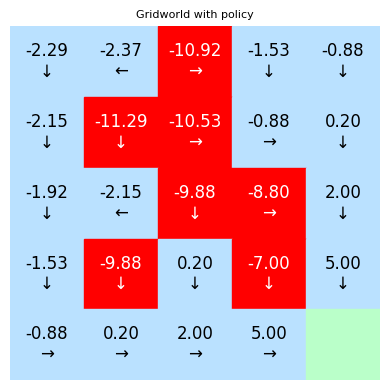

In [125]:
visualize_gridworld(gridworld, state_values)